## Classification

In this file we look at some persitancy data. I did some analysis on it

============================================================================

## In this analysis:



The approach we used was, we looked at features whose missing data was less than 5 % of the feature set and we dropped those. We then used one hot encoding to encode the remaining data and encoded the missing values as a feature. This may not be the best approach.

In [1]:
! pip install feature_engine

     |████████████████████████████████| 180 kB 9.7 MB/s 
     |████████████████████████████████| 9.5 MB 16.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

# for feature engineering
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

In [3]:
# to show all the columns of the dataframe in the notebook
pd.set_option('display.max_columns', None)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load dataset



data = pd.read_excel('/content/drive/MyDrive/Healthcare_dataset.xlsx', sheet_name='Dataset')

data.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [6]:
tmp = pd.get_dummies(data['Persistency_Flag'], drop_first=True)

tmp.head()

,Persistent
0,1
1,0
2,0
3,0
4,0


In [7]:
data['Persistency_Flag']=tmp

In [8]:
data.head(3)

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,1,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,0,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,0,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2


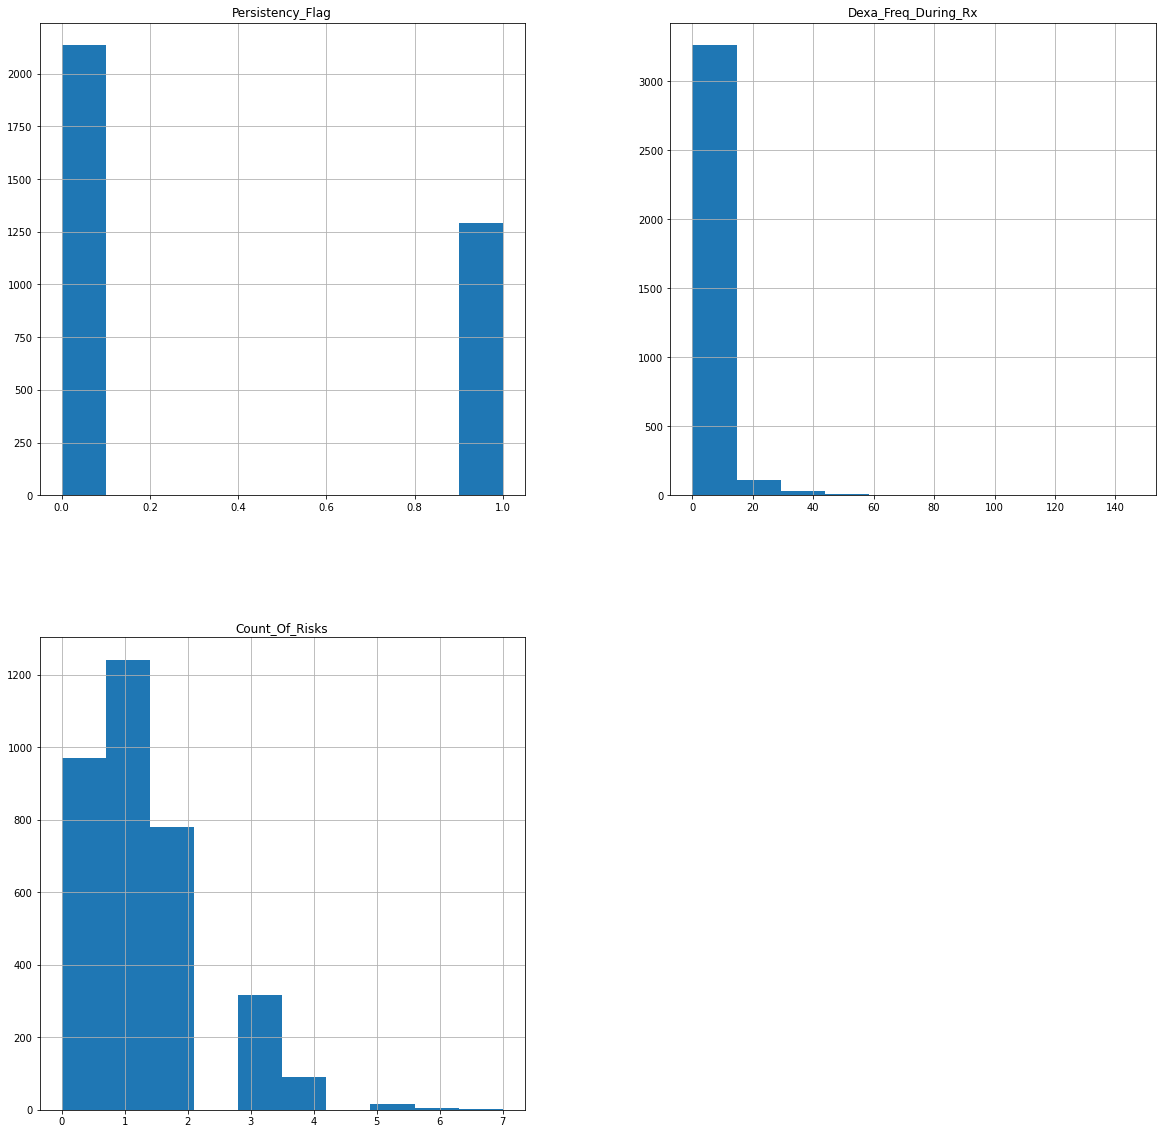

In [103]:
# let's explore the distribution of the numerical variables

data.hist(figsize=(20,20))
plt.show()

Text(0, 0.5, 'Number of people')

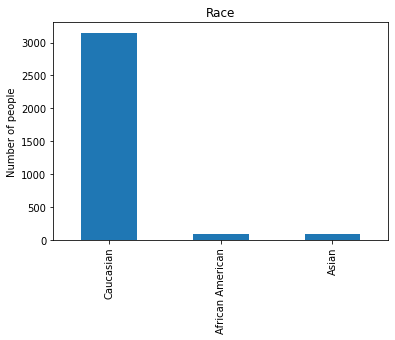

In [104]:
# let's make a bar plot, with the number of people of a particular race
# 

# the code below counts the number of observations (Race)
# within each category and then makes a bar plot

fig = data['Race'].value_counts().plot.bar()
fig.set_title('Race')
fig.set_ylabel('Number of people')

Text(0, 0.5, 'Number of people')

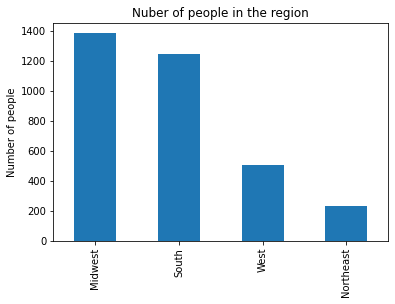

In [105]:
# let's make a bar plot, with the number of people of a particular race
# 

# the code below counts the number of observations (Race)
# within each category and then makes a bar plot

fig = data['Region'].value_counts().plot.bar()
fig.set_title('Nuber of people in the region')
fig.set_ylabel('Number of people')

Text(0, 0.5, 'Number of people')

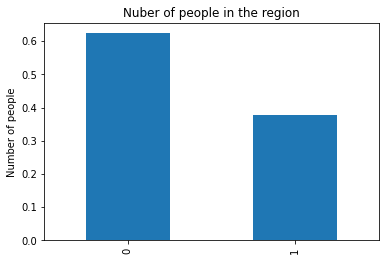

In [106]:
# let's make a bar plot, with the number of people of a particular race
# 

# the code below counts the number of observations (Race)
# within each category and then makes a bar plot

fig = data['Persistency_Flag'].value_counts(normalize=True).plot.bar()
fig.set_title('Nuber of people in the region')
fig.set_ylabel('Number of people')

Text(0, 0.5, 'Number of people')

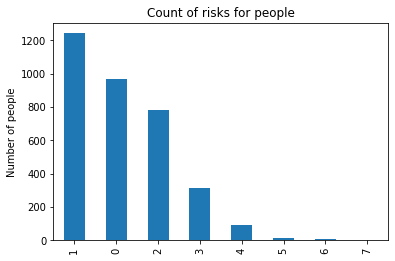

In [107]:
# let's make a bar plot, with the number of people and the number of risks
# 

# the code below counts the number of observations (Race)
# within each category and then makes a bar plot

fig = data['Count_Of_Risks'].value_counts().plot.bar()
fig.set_title('Count of risks for people')
fig.set_ylabel('Number of people')

Text(0, 0.5, 'Number of people')

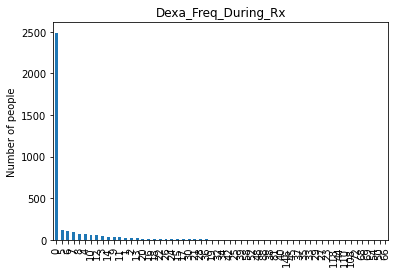

In [108]:
# let's make a bar plot, with the number of people and the number of risks
# 

# the code below counts the number of observations (Race)
# within each category and then makes a bar plot

fig = data['Dexa_Freq_During_Rx'].value_counts().plot.bar()
fig.set_title('Dexa_Freq_During_Rx')
fig.set_ylabel('Number of people')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   uint8 
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

### Types of variables (section 2)

Let's find out what types of variables there are in this dataset

In [10]:
# let's inspect the type of variables in pandas

data.dtypes

Ptid                              object
Persistency_Flag                   uint8
Gender                            object
Race                              object
Ethnicity                         object
                                   ...  
Risk_Hysterectomy_Oophorectomy    object
Risk_Estrogen_Deficiency          object
Risk_Immobilization               object
Risk_Recurring_Falls              object
Count_Of_Risks                     int64
Length: 69, dtype: object

There are categorical and numerical variables.

In [11]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

Ptid ['P1' 'P2' 'P3' 'P4' 'P5' 'P6' 'P7' 'P8' 'P9' 'P10' 'P11' 'P12' 'P13'
 'P14' 'P15' 'P16' 'P17' 'P18' 'P19' 'P20'] 

Persistency_Flag [1 0] 

Gender ['Male' 'Female'] 

Race ['Caucasian' 'Asian' 'Other/Unknown' 'African American'] 

Ethnicity ['Not Hispanic' 'Hispanic' 'Unknown'] 

Region ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast'] 

Age_Bucket ['>75' '55-65' '65-75' '<55'] 

Ntm_Speciality ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE'] 

Ntm_Specialist_Flag ['Others' 'Specialist'] 

Ntm_Speciality_Bucket ['OB/GYN/Others/PCP/Unknown' 'Endo/Onc/Uro' 'Rheum'] 

Gluco_Record_Prior_Ntm ['N' 'Y'] 

Gluco_Record_During_Rx ['N' 'Y'] 

Dex

There continuous.

In [12]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Persistent' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Non-Persistent' and var not in discrete]

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' ]

print('There are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))


There are 2 discrete variables
There are 1 continuous variables
There are 66 categorical variables


In [13]:
discrete

['Persistency_Flag', 'Count_Of_Risks']

In [14]:

continuous

['Dexa_Freq_During_Rx']

In [15]:
categorical

['Ptid',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Speciality',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_D

In [16]:
data = data.replace('Unknown', np.nan)
data = data.replace('Other/Unknown', np.nan)

In [17]:
data.isnull().sum()

Ptid                               0
Persistency_Flag                   0
Gender                             0
Race                              97
Ethnicity                         91
                                  ..
Risk_Hysterectomy_Oophorectomy     0
Risk_Estrogen_Deficiency           0
Risk_Immobilization                0
Risk_Recurring_Falls               0
Count_Of_Risks                     0
Length: 69, dtype: int64

In [18]:
# find the variables with missing observations

vars_with_na = [var for var in data.columns if data[var].isnull().mean() > 0]

vars_with_na 

['Race',
 'Ethnicity',
 'Region',
 'Ntm_Speciality',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment']

In [19]:
# let's find out whether they are numerical or categorical
data[vars_with_na].dtypes

Race                       object
Ethnicity                  object
Region                     object
Ntm_Speciality             object
Risk_Segment_During_Rx     object
Tscore_Bucket_During_Rx    object
Change_T_Score             object
Change_Risk_Segment        object
dtype: object

In [20]:
# let's have a look at the values of the variables with
# missing data

data[vars_with_na].head(10)

,Race,Ethnicity,Region,Ntm_Speciality,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment
0,Caucasian,Not Hispanic,West,GENERAL PRACTITIONER,VLR_LR,<=-2.5,No change,NaN
1,Asian,Not Hispanic,West,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
2,NaN,Hispanic,Midwest,GENERAL PRACTITIONER,HR_VHR,<=-2.5,No change,No change
3,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,HR_VHR,<=-2.5,No change,No change
4,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
5,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
6,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
7,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,HR_VHR,<=-2.5,No change,No change
8,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN
9,Caucasian,Not Hispanic,Midwest,GENERAL PRACTITIONER,NaN,NaN,NaN,NaN


In [21]:
# let's find out the percentage of observations missing per variable

# calculate the percentage of missing (as we did in section 3)
# using the isnull() and mean() methods from pandas
data_na = data[vars_with_na].isnull().mean()

# transform the array into a dataframe
data_na = pd.DataFrame(data_na.reset_index())

# add column names to the dataframe
data_na.columns = ['variable', 'na_percentage']

# order the dataframe according to percentage of na per variable
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# show
data_na

,variable,na_percentage
7,Change_Risk_Segment,0.650993
4,Risk_Segment_During_Rx,0.437208
5,Tscore_Bucket_During_Rx,0.437208
6,Change_T_Score,0.437208
3,Ntm_Speciality,0.090537
0,Race,0.028329
1,Ethnicity,0.026577
2,Region,0.017523


In [22]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels='Persistency_Flag', axis=1),
    data['Persistency_Flag'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((2396, 68), (1028, 68))

In [23]:
X_train

,Ptid,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
942,P943,Female,Caucasian,Not Hispanic,South,>75,RHEUMATOLOGY,Specialist,Rheum,N,Y,0,N,N,N,VLR_LR,>-2.5,VLR_LR,>-2.5,Improved,NaN,Adherent,Y,Y,N,Y,N,Y,Y,N,Y,Y,N,N,Y,N,N,Y,Y,Y,Y,N,Y,N,Y,N,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,2
3086,P3087,Female,Caucasian,Not Hispanic,Midwest,55-65,RHEUMATOLOGY,Specialist,Rheum,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,>-2.5,No change,NaN,Adherent,Y,Y,Y,N,N,Y,Y,Y,N,Y,Y,N,N,N,Y,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,2
2313,P2314,Female,Caucasian,Not Hispanic,Northeast,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,Y,Y,N,N,N,N,N,Y,N,N,Y,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,2
831,P832,Female,Caucasian,Not Hispanic,South,>75,RHEUMATOLOGY,Specialist,Rheum,N,Y,0,N,N,N,VLR_LR,>-2.5,NaN,NaN,NaN,NaN,Adherent,Y,Y,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,2
215,P216,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,>-2.5,No change,No change,Adherent,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,P836,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,Y,Y,0,N,N,N,HR_VHR,<=-2.5,NaN,NaN,NaN,NaN,Adherent,Y,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,1
3264,P3265,Female,African American,Not Hispanic,South,65-75,NaN,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,NaN,NaN,NaN,NaN,Adherent,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1653,P1654,Female,Caucasian,Not 

In [64]:
# capture variables with no or less than 5% NA

vars_cca = [var for var in X_train.columns if X_train[var].isnull().mean() < 0.05]
vars_cca_test = [var for var in X_test.columns if X_test[var].isnull().mean() < 0.05]
vars_cca

['Ptid',
 'Gender',
 'Race',
 'Ethnicity',
 'Region',
 'Age_Bucket',
 'Ntm_Specialist_Flag',
 'Ntm_Speciality_Bucket',
 'Gluco_Record_Prior_Ntm',
 'Gluco_Record_During_Rx',
 'Dexa_Freq_During_Rx',
 'Dexa_During_Rx',
 'Frag_Frac_Prior_Ntm',
 'Frag_Frac_During_Rx',
 'Risk_Segment_Prior_Ntm',
 'Tscore_Bucket_Prior_Ntm',
 'Adherent_Flag',
 'Idn_Indicator',
 'Injectable_Experience_During_Rx',
 'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
 'Comorb_Encounter_For_Immunization',
 'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
 'Comorb_Vitamin_D_Deficiency',
 'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
 'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
 'Comorb_Long_Term_Current_Drug_Therapy',
 'Comorb_Dorsalgia',
 'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
 'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
 'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'Comorb_Osteoporosis_without_curre

In [65]:
ars_ccazv = [var for var in X_train.columns if X_train[var].isnull().mean() > 0.05]
ars_ccazv

['Ntm_Speciality',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment']

In [101]:
# calculate percentage of observations with complete
# cases: i.e., with values for all the variables

# the method dropna(), discards the observations that contain
# na in any of the rows / columns

len(X_train[vars_cca].dropna()) / len(X_train)


0.9328046744574291

In [102]:
len(X_test[vars_cca_test].dropna()) / len(X_test)

0.9406614785992218

In [68]:
# create the complete case dataset
# in other words, remove observations with na in any variable

X_train_cca = X_train[vars_cca].dropna()
X_train.shape, X_train_cca.shape

((2396, 68), (2235, 63))

In [69]:
# create the complete case dataset
# in other words, remove observations with na in any variable

X_test_cca = X_test[vars_cca].dropna()
X_test.shape, X_test_cca.shape

((1028, 68), (967, 63))

In [70]:
# the following function captures the percentage of observations
# for each category in the original and complete case dataset
# and puts them together in a new dataframe


def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
        [
            # percentage of observations per category, original data
            df[variable].value_counts() / len(df),

            # percentage of observations per category, cca data
            df_cca[variable].value_counts() / len(df_cca)
        ],
        axis=1)

    # add column names
    tmp.columns = ['original', 'cca']

    return tmp

In [71]:
# run the function in a categorical variable
categorical_distribution(X_train, X_train_cca, 'Race')

,original,cca
Caucasian,0.922371,0.949888
African American,0.026294,0.025951
Asian,0.023372,0.024161


In [72]:
categorical_distribution(X_train, X_train_cca, 'Ethnicity')

,original,cca
Not Hispanic,0.942821,0.978971
Hispanic,0.030467,0.021029


In [73]:
categorical_distribution(X_train, X_train_cca, 'Region')

,original,cca
Midwest,0.412771,0.429083
South,0.361853,0.366443
West,0.140234,0.141387
Northeast,0.065109,0.063087


In [74]:
X_train_missing=X_train[['Ptid','Ntm_Speciality',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment']]



In [75]:
X_test_missing=X_test[['Ptid','Ntm_Speciality',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment']]

In [76]:
# to split the datasets
from sklearn.model_selection import train_test_split

# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

# for one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

In [77]:
ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    variables=['Ntm_Speciality',
 'Risk_Segment_During_Rx',
 'Tscore_Bucket_During_Rx',
 'Change_T_Score',
 'Change_Risk_Segment'],  # we can select which variables to encode
    drop_last=True)  # to return k-1, false to return k


ohe_enc.fit(X_train_missing.fillna('Missing'))

OneHotEncoder(drop_last=True, drop_last_binary=False, ignore_format=False,
              top_categories=None,
              variables=['Ntm_Speciality', 'Risk_Segment_During_Rx',
                         'Tscore_Bucket_During_Rx', 'Change_T_Score',
                         'Change_Risk_Segment'])

In [78]:
ohe_enc.fit(X_test_missing.fillna('Missing'))

OneHotEncoder(drop_last=True, drop_last_binary=False, ignore_format=False,
              top_categories=None,
              variables=['Ntm_Speciality', 'Risk_Segment_During_Rx',
                         'Tscore_Bucket_During_Rx', 'Change_T_Score',
                         'Change_Risk_Segment'])

In [79]:
tmp_train = ohe_enc.transform(X_train_missing.fillna('Missing'))

tmp_train.head()

,Ptid,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GENERAL PRACTITIONER,Ntm_Speciality_Missing,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_UROLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_ORTHOPEDIC SURGERY,Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality_PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality_HEMATOLOGY & ONCOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PODIATRY,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_GERIATRIC MEDICINE,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_ORTHOPEDICS,Risk_Segment_During_Rx_VLR_LR,Risk_Segment_During_Rx_Missing,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Missing,Change_T_Score_No change,Change_T_Score_Missing,Change_T_Score_Worsened,Change_Risk_Segment_Missing,Change_Risk_Segment_No change,Change_Risk_Segment_Worsened
942,P943,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
3086,P3087,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
2313,P2314,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
831,P832,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0
215,P216,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0


In [80]:
tmp_test = ohe_enc.transform(X_test_missing.fillna('Missing'))

tmp_test.head()

,Ptid,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GENERAL PRACTITIONER,Ntm_Speciality_Missing,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_UROLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_ORTHOPEDIC SURGERY,Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality_PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality_HEMATOLOGY & ONCOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PODIATRY,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_GERIATRIC MEDICINE,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_ORTHOPEDICS,Risk_Segment_During_Rx_VLR_LR,Risk_Segment_During_Rx_Missing,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Missing,Change_T_Score_No change,Change_T_Score_Missing,Change_T_Score_Worsened,Change_Risk_Segment_Missing,Change_Risk_Segment_No change,Change_Risk_Segment_Worsened
927,P928,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
182,P183,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0
33,P34,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0
1473,P1474,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0
981,P982,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [81]:
ohe_enc_1 = fe_OneHotEncoder(
    top_categories=None,
    variables=[ 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
       'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
       'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Adherent_Flag', 'Idn_Indicator',
       'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
       'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
       'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
       'Comorb_Osteoporosis_without_current_pathological_fracture',
       'Comorb_Personal_history_of_malignant_neoplasm',
       'Comorb_Gastro_esophageal_reflux_disease',
       'Concom_Cholesterol_And_Triglyceride_Regulating_Preparations',
       'Concom_Narcotics', 'Concom_Systemic_Corticosteroids_Plain',
       'Concom_Anti_Depressants_And_Mood_Stabilisers',
       'Concom_Fluoroquinolones', 'Concom_Cephalosporins',
       'Concom_Macrolides_And_Similar_Types',
       'Concom_Broad_Spectrum_Penicillins', 'Concom_Anaesthetics_General',
       'Concom_Viral_Vaccines', 'Risk_Type_1_Insulin_Dependent_Diabetes',
       'Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis',
       'Risk_Untreated_Chronic_Hyperthyroidism',
       'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause',
       'Risk_Patient_Parent_Fractured_Their_Hip', 'Risk_Smoking_Tobacco',
       'Risk_Chronic_Malnutrition_Or_Malabsorption',
       'Risk_Chronic_Liver_Disease', 'Risk_Family_History_Of_Osteoporosis',
       'Risk_Low_Calcium_Intake', 'Risk_Vitamin_D_Insufficiency',
       'Risk_Poor_Health_Frailty', 'Risk_Excessive_Thinness',
       'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency',
       'Risk_Immobilization', 'Risk_Recurring_Falls'],  # we can select which variables to encode
    drop_last=True)  # to return k-1, false to return k


ohe_enc_1.fit(X_train_cca)

OneHotEncoder(drop_last=True, drop_last_binary=False, ignore_format=False,
              top_categories=None,
              variables=['Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket',
                         'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
                         'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
                         'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
                         'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
                         'Tscore_Bucket_...
                         'Comorb_Long_Term_Current_Drug_Therapy',
                         'Comorb_Dorsalgia',
                         'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
                         'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
                         'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
                         'Comorb_Osteoporosis_without_current_pathological_fracture',
                     

In [82]:


ohe_enc_1.fit(X_test_cca)

OneHotEncoder(drop_last=True, drop_last_binary=False, ignore_format=False,
              top_categories=None,
              variables=['Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket',
                         'Ntm_Specialist_Flag', 'Ntm_Speciality_Bucket',
                         'Gluco_Record_Prior_Ntm', 'Gluco_Record_During_Rx',
                         'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
                         'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
                         'Tscore_Bucket_...
                         'Comorb_Long_Term_Current_Drug_Therapy',
                         'Comorb_Dorsalgia',
                         'Comorb_Personal_History_Of_Other_Diseases_And_Conditions',
                         'Comorb_Other_Disorders_Of_Bone_Density_And_Structure',
                         'Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias',
                         'Comorb_Osteoporosis_without_current_pathological_fracture',
                     

In [83]:
tmp_train_cca = ohe_enc_1.transform(X_train_cca)

tmp_train_cca.head()

,Ptid,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Female,Race_Caucasian,Race_Asian,Ethnicity_Not Hispanic,Region_South,Region_Midwest,Region_West,Age_Bucket_>75,Age_Bucket_<55,Age_Bucket_55-65,Ntm_Specialist_Flag_Specialist,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Gluco_Record_Prior_Ntm_N,Gluco_Record_During_Rx_Y,Dexa_During_Rx_Y,Frag_Frac_Prior_Ntm_N,Frag_Frac_During_Rx_N,Risk_Segment_Prior_Ntm_VLR_LR,Tscore_Bucket_Prior_Ntm_>-2.5,Adherent_Flag_Adherent,Idn_Indicator_Y,Injectable_Experience_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N",Comorb_Vitamin_D_Deficiency_N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_Y,Comorb_Long_Term_Current_Drug_Therapy_Y,Comorb_Dorsalgia_Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_Y,Comorb_Osteoporosis_without_current_pathological_fracture_Y,Comorb_Personal_history_of_malignant_neoplasm_N,Comorb_Gastro_esophageal_reflux_disease_Y,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y,Concom_Narcotics_Y,Concom_Systemic_Corticosteroids_Plain_Y,Concom_Anti_Depressants_And_Mood_Stabilisers_Y,Concom_Fluoroquinolones_Y,Concom_Cephalosporins_Y,Concom_Macrolides_And_Similar_Types_N,Concom_Broad_Spectrum_Penicillins_N,Concom_Anaesthetics_General_Y,Concom_Viral_Vaccines_N,Risk_Type_1_Insulin_Dependent_Diabetes_N,Risk_Rheumatoid_Arthritis_N,Risk_Untreated_Chronic_Hyperthyroidism_N,Risk_Untreated_Chronic_Hypogonadism_N,Risk_Untreated_Early_Menopause_N,Risk_Patient_Parent_Fractured_Their_Hip_N,Risk_Smoking_Tobacco_Y,Risk_Chronic_Malnutrition_Or_Malabsorption_N,Risk_Chronic_Liver_Disease_N,Risk_Family_History_Of_Osteoporosis_N,Risk_Low_Calcium_Intake_N,Risk_Vitamin_D_Insufficiency_N,Risk_Poor_Health_Frailty_N,Risk_Excessive_Thinness_N,Risk_Hysterectomy_Oophorectomy_N,Risk_Estrogen_Deficiency_N,Risk_Immobilization_N,Risk_Recurring_Falls_N
942,P943,0,2,1,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,0,1,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1
3086,P3087,0,2,1,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
2313,P2314,0,2,1,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1
831,P832,0,2,1,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
215,P216,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1


In [84]:
tmp_test_cca = ohe_enc_1.transform(X_test_cca)

tmp_test_cca.head()

,Ptid,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Female,Race_Caucasian,Race_Asian,Ethnicity_Not Hispanic,Region_South,Region_Midwest,Region_West,Age_Bucket_>75,Age_Bucket_<55,Age_Bucket_55-65,Ntm_Specialist_Flag_Specialist,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Gluco_Record_Prior_Ntm_N,Gluco_Record_During_Rx_Y,Dexa_During_Rx_Y,Frag_Frac_Prior_Ntm_N,Frag_Frac_During_Rx_N,Risk_Segment_Prior_Ntm_VLR_LR,Tscore_Bucket_Prior_Ntm_>-2.5,Adherent_Flag_Adherent,Idn_Indicator_Y,Injectable_Experience_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N",Comorb_Vitamin_D_Deficiency_N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_Y,Comorb_Long_Term_Current_Drug_Therapy_Y,Comorb_Dorsalgia_Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_Y,Comorb_Osteoporosis_without_current_pathological_fracture_Y,Comorb_Personal_history_of_malignant_neoplasm_N,Comorb_Gastro_esophageal_reflux_disease_Y,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y,Concom_Narcotics_Y,Concom_Systemic_Corticosteroids_Plain_Y,Concom_Anti_Depressants_And_Mood_Stabilisers_Y,Concom_Fluoroquinolones_Y,Concom_Cephalosporins_Y,Concom_Macrolides_And_Similar_Types_N,Concom_Broad_Spectrum_Penicillins_N,Concom_Anaesthetics_General_Y,Concom_Viral_Vaccines_N,Risk_Type_1_Insulin_Dependent_Diabetes_N,Risk_Rheumatoid_Arthritis_N,Risk_Untreated_Chronic_Hyperthyroidism_N,Risk_Untreated_Chronic_Hypogonadism_N,Risk_Untreated_Early_Menopause_N,Risk_Patient_Parent_Fractured_Their_Hip_N,Risk_Smoking_Tobacco_Y,Risk_Chronic_Malnutrition_Or_Malabsorption_N,Risk_Chronic_Liver_Disease_N,Risk_Family_History_Of_Osteoporosis_N,Risk_Low_Calcium_Intake_N,Risk_Vitamin_D_Insufficiency_N,Risk_Poor_Health_Frailty_N,Risk_Excessive_Thinness_N,Risk_Hysterectomy_Oophorectomy_N,Risk_Estrogen_Deficiency_N,Risk_Immobilization_N,Risk_Recurring_Falls_N
927,P928,6,1,1,1,0,1,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
182,P183,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
33,P34,13,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
1473,P1474,0,1,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1
1403,P1404,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1


In [85]:
X_train_encoded_n=pd.merge(tmp_train_cca, tmp_train, on='Ptid', how='inner')
X_train_encoded_n.head(2)

,Ptid,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Female,Race_Caucasian,Race_Asian,Ethnicity_Not Hispanic,Region_South,Region_Midwest,Region_West,Age_Bucket_>75,Age_Bucket_<55,Age_Bucket_55-65,Ntm_Specialist_Flag_Specialist,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Gluco_Record_Prior_Ntm_N,Gluco_Record_During_Rx_Y,Dexa_During_Rx_Y,Frag_Frac_Prior_Ntm_N,Frag_Frac_During_Rx_N,Risk_Segment_Prior_Ntm_VLR_LR,Tscore_Bucket_Prior_Ntm_>-2.5,Adherent_Flag_Adherent,Idn_Indicator_Y,Injectable_Experience_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N",Comorb_Vitamin_D_Deficiency_N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_Y,Comorb_Long_Term_Current_Drug_Therapy_Y,Comorb_Dorsalgia_Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_Y,Comorb_Osteoporosis_without_current_pathological_fracture_Y,Comorb_Personal_history_of_malignant_neoplasm_N,Comorb_Gastro_esophageal_reflux_disease_Y,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y,Concom_Narcotics_Y,Concom_Systemic_Corticosteroids_Plain_Y,Concom_Anti_Depressants_And_Mood_Stabilisers_Y,Concom_Fluoroquinolones_Y,Concom_Cephalosporins_Y,Concom_Macrolides_And_Similar_Types_N,Concom_Broad_Spectrum_Penicillins_N,Concom_Anaesthetics_General_Y,Concom_Viral_Vaccines_N,Risk_Type_1_Insulin_Dependent_Diabetes_N,Risk_Rheumatoid_Arthritis_N,Risk_Untreated_Chronic_Hyperthyroidism_N,Risk_Untreated_Chronic_Hypogonadism_N,Risk_Untreated_Early_Menopause_N,Risk_Patient_Parent_Fractured_Their_Hip_N,Risk_Smoking_Tobacco_Y,Risk_Chronic_Malnutrition_Or_Malabsorption_N,Risk_Chronic_Liver_Disease_N,Risk_Family_History_Of_Osteoporosis_N,Risk_Low_Calcium_Intake_N,Risk_Vitamin_D_Insufficiency_N,Risk_Poor_Health_Frailty_N,Risk_Excessive_Thinness_N,Risk_Hysterectomy_Oophorectomy_N,Risk_Estrogen_Deficiency_N,Risk_Immobilization_N,Risk_Recurring_Falls_N,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GENERAL PRACTITIONER,Ntm_Speciality_Missing,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_UROLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_ORTHOPEDIC SURGERY,Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality_PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality_HEMATOLOGY & ONCOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PODIATRY,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_GERIATRIC MEDICINE,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_ORTHOPEDICS,Risk_Segment_During_Rx_VLR_LR,Risk_Segment_During_Rx_Missing,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Missing,Change_T_Score_No change,Change_T_Score_Missing,Change_T_Score_Worsened,Change_Risk_Segment_Missing,Change_Risk_Segment_No change,Change_Risk_Segment_Worsened
0,P943,0,2,1,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,0,1,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,P3087,0,2,1,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0


In [86]:
X_test_encoded_n=pd.merge(tmp_test_cca, tmp_test, on='Ptid', how='inner')
X_test_encoded_n.head(2)

,Ptid,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Female,Race_Caucasian,Race_Asian,Ethnicity_Not Hispanic,Region_South,Region_Midwest,Region_West,Age_Bucket_>75,Age_Bucket_<55,Age_Bucket_55-65,Ntm_Specialist_Flag_Specialist,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Gluco_Record_Prior_Ntm_N,Gluco_Record_During_Rx_Y,Dexa_During_Rx_Y,Frag_Frac_Prior_Ntm_N,Frag_Frac_During_Rx_N,Risk_Segment_Prior_Ntm_VLR_LR,Tscore_Bucket_Prior_Ntm_>-2.5,Adherent_Flag_Adherent,Idn_Indicator_Y,Injectable_Experience_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N",Comorb_Vitamin_D_Deficiency_N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_Y,Comorb_Long_Term_Current_Drug_Therapy_Y,Comorb_Dorsalgia_Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_Y,Comorb_Osteoporosis_without_current_pathological_fracture_Y,Comorb_Personal_history_of_malignant_neoplasm_N,Comorb_Gastro_esophageal_reflux_disease_Y,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y,Concom_Narcotics_Y,Concom_Systemic_Corticosteroids_Plain_Y,Concom_Anti_Depressants_And_Mood_Stabilisers_Y,Concom_Fluoroquinolones_Y,Concom_Cephalosporins_Y,Concom_Macrolides_And_Similar_Types_N,Concom_Broad_Spectrum_Penicillins_N,Concom_Anaesthetics_General_Y,Concom_Viral_Vaccines_N,Risk_Type_1_Insulin_Dependent_Diabetes_N,Risk_Rheumatoid_Arthritis_N,Risk_Untreated_Chronic_Hyperthyroidism_N,Risk_Untreated_Chronic_Hypogonadism_N,Risk_Untreated_Early_Menopause_N,Risk_Patient_Parent_Fractured_Their_Hip_N,Risk_Smoking_Tobacco_Y,Risk_Chronic_Malnutrition_Or_Malabsorption_N,Risk_Chronic_Liver_Disease_N,Risk_Family_History_Of_Osteoporosis_N,Risk_Low_Calcium_Intake_N,Risk_Vitamin_D_Insufficiency_N,Risk_Poor_Health_Frailty_N,Risk_Excessive_Thinness_N,Risk_Hysterectomy_Oophorectomy_N,Risk_Estrogen_Deficiency_N,Risk_Immobilization_N,Risk_Recurring_Falls_N,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GENERAL PRACTITIONER,Ntm_Speciality_Missing,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_UROLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_ORTHOPEDIC SURGERY,Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality_PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality_HEMATOLOGY & ONCOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PODIATRY,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_GERIATRIC MEDICINE,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_ORTHOPEDICS,Risk_Segment_During_Rx_VLR_LR,Risk_Segment_During_Rx_Missing,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Missing,Change_T_Score_No change,Change_T_Score_Missing,Change_T_Score_Worsened,Change_Risk_Segment_Missing,Change_Risk_Segment_No change,Change_Risk_Segment_Worsened
0,P928,6,1,1,1,0,1,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
1,P183,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0


In [87]:
# Lets make a y_train and y_test which follow the upgraded x_train and x_test
old_data=data[['Ptid','Persistency_Flag']]
old_data;

In [88]:
new_id_train=X_train_encoded_n['Ptid']
new_id_train

0        P943
1       P3087
2       P2314
3        P832
4        P216
        ...  
2230     P836
2231    P3265
2232    P1654
2233    P2608
2234    P2733
Name: Ptid, Length: 2235, dtype: object

In [89]:
y_train=pd.merge(old_data, new_id_train, on='Ptid', how='inner')
y_train=y_train.drop(['Ptid'], axis=1)
y_train

,Persistency_Flag
0,1
1,0
2,0
3,0
4,0
...,...
2230,0
2231,1
2232,1
2233,0


In [90]:
new_id_test=X_test_encoded_n['Ptid']
new_id_test

0       P928
1       P183
2        P34
3      P1474
4      P1404
       ...  
962    P1140
963    P2866
964    P1948
965    P3294
966    P1713
Name: Ptid, Length: 967, dtype: object

In [91]:
y_test=pd.merge(old_data, new_id_test, on='Ptid', how='inner')
y_test=y_test.drop(['Ptid'], axis=1)
y_test

,Persistency_Flag
0,0
1,0
2,0
3,0
4,0
...,...
962,1
963,0
964,0
965,1


In [92]:
X_test_encoded_n=pd.merge(tmp_test_cca, tmp_test, on='Ptid', how='inner')

In [93]:
X_train_encoded=X_train_encoded_n.drop(['Ptid'],axis=1)
X_train_encoded.head(2)

,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Female,Race_Caucasian,Race_Asian,Ethnicity_Not Hispanic,Region_South,Region_Midwest,Region_West,Age_Bucket_>75,Age_Bucket_<55,Age_Bucket_55-65,Ntm_Specialist_Flag_Specialist,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Gluco_Record_Prior_Ntm_N,Gluco_Record_During_Rx_Y,Dexa_During_Rx_Y,Frag_Frac_Prior_Ntm_N,Frag_Frac_During_Rx_N,Risk_Segment_Prior_Ntm_VLR_LR,Tscore_Bucket_Prior_Ntm_>-2.5,Adherent_Flag_Adherent,Idn_Indicator_Y,Injectable_Experience_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N",Comorb_Vitamin_D_Deficiency_N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_Y,Comorb_Long_Term_Current_Drug_Therapy_Y,Comorb_Dorsalgia_Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_Y,Comorb_Osteoporosis_without_current_pathological_fracture_Y,Comorb_Personal_history_of_malignant_neoplasm_N,Comorb_Gastro_esophageal_reflux_disease_Y,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y,Concom_Narcotics_Y,Concom_Systemic_Corticosteroids_Plain_Y,Concom_Anti_Depressants_And_Mood_Stabilisers_Y,Concom_Fluoroquinolones_Y,Concom_Cephalosporins_Y,Concom_Macrolides_And_Similar_Types_N,Concom_Broad_Spectrum_Penicillins_N,Concom_Anaesthetics_General_Y,Concom_Viral_Vaccines_N,Risk_Type_1_Insulin_Dependent_Diabetes_N,Risk_Rheumatoid_Arthritis_N,Risk_Untreated_Chronic_Hyperthyroidism_N,Risk_Untreated_Chronic_Hypogonadism_N,Risk_Untreated_Early_Menopause_N,Risk_Patient_Parent_Fractured_Their_Hip_N,Risk_Smoking_Tobacco_Y,Risk_Chronic_Malnutrition_Or_Malabsorption_N,Risk_Chronic_Liver_Disease_N,Risk_Family_History_Of_Osteoporosis_N,Risk_Low_Calcium_Intake_N,Risk_Vitamin_D_Insufficiency_N,Risk_Poor_Health_Frailty_N,Risk_Excessive_Thinness_N,Risk_Hysterectomy_Oophorectomy_N,Risk_Estrogen_Deficiency_N,Risk_Immobilization_N,Risk_Recurring_Falls_N,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GENERAL PRACTITIONER,Ntm_Speciality_Missing,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_UROLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_ORTHOPEDIC SURGERY,Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality_PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality_HEMATOLOGY & ONCOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PODIATRY,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_GERIATRIC MEDICINE,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_ORTHOPEDICS,Risk_Segment_During_Rx_VLR_LR,Risk_Segment_During_Rx_Missing,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Missing,Change_T_Score_No change,Change_T_Score_Missing,Change_T_Score_Worsened,Change_Risk_Segment_Missing,Change_Risk_Segment_No change,Change_Risk_Segment_Worsened
0,0,2,1,1,0,1,1,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,1,0,1,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,0,2,1,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0


In [94]:
X_test_encoded=X_test_encoded_n.drop(['Ptid'],axis=1)
X_test_encoded.head(2)

,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Female,Race_Caucasian,Race_Asian,Ethnicity_Not Hispanic,Region_South,Region_Midwest,Region_West,Age_Bucket_>75,Age_Bucket_<55,Age_Bucket_55-65,Ntm_Specialist_Flag_Specialist,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Gluco_Record_Prior_Ntm_N,Gluco_Record_During_Rx_Y,Dexa_During_Rx_Y,Frag_Frac_Prior_Ntm_N,Frag_Frac_During_Rx_N,Risk_Segment_Prior_Ntm_VLR_LR,Tscore_Bucket_Prior_Ntm_>-2.5,Adherent_Flag_Adherent,Idn_Indicator_Y,Injectable_Experience_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N",Comorb_Vitamin_D_Deficiency_N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_Y,Comorb_Long_Term_Current_Drug_Therapy_Y,Comorb_Dorsalgia_Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_Y,Comorb_Osteoporosis_without_current_pathological_fracture_Y,Comorb_Personal_history_of_malignant_neoplasm_N,Comorb_Gastro_esophageal_reflux_disease_Y,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y,Concom_Narcotics_Y,Concom_Systemic_Corticosteroids_Plain_Y,Concom_Anti_Depressants_And_Mood_Stabilisers_Y,Concom_Fluoroquinolones_Y,Concom_Cephalosporins_Y,Concom_Macrolides_And_Similar_Types_N,Concom_Broad_Spectrum_Penicillins_N,Concom_Anaesthetics_General_Y,Concom_Viral_Vaccines_N,Risk_Type_1_Insulin_Dependent_Diabetes_N,Risk_Rheumatoid_Arthritis_N,Risk_Untreated_Chronic_Hyperthyroidism_N,Risk_Untreated_Chronic_Hypogonadism_N,Risk_Untreated_Early_Menopause_N,Risk_Patient_Parent_Fractured_Their_Hip_N,Risk_Smoking_Tobacco_Y,Risk_Chronic_Malnutrition_Or_Malabsorption_N,Risk_Chronic_Liver_Disease_N,Risk_Family_History_Of_Osteoporosis_N,Risk_Low_Calcium_Intake_N,Risk_Vitamin_D_Insufficiency_N,Risk_Poor_Health_Frailty_N,Risk_Excessive_Thinness_N,Risk_Hysterectomy_Oophorectomy_N,Risk_Estrogen_Deficiency_N,Risk_Immobilization_N,Risk_Recurring_Falls_N,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GENERAL PRACTITIONER,Ntm_Speciality_Missing,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_UROLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_ORTHOPEDIC SURGERY,Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality_PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality_HEMATOLOGY & ONCOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PODIATRY,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_GERIATRIC MEDICINE,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_ORTHOPEDICS,Risk_Segment_During_Rx_VLR_LR,Risk_Segment_During_Rx_Missing,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Missing,Change_T_Score_No change,Change_T_Score_Missing,Change_T_Score_Worsened,Change_Risk_Segment_Missing,Change_Risk_Segment_No change,Change_Risk_Segment_Worsened
0,6,1,1,1,0,1,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0
1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0


In [95]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2234
Data columns (total 100 columns):
 #   Column                                                                         Non-Null Count  Dtype
---  ------                                                                         --------------  -----
 0   Dexa_Freq_During_Rx                                                            2235 non-null   int64
 1   Count_Of_Risks                                                                 2235 non-null   int64
 2   Gender_Female                                                                  2235 non-null   int64
 3   Race_Caucasian                                                                 2235 non-null   int64
 4   Race_Asian                                                                     2235 non-null   int64
 5   Ethnicity_Not Hispanic                                                         2235 non-null   int64
 6   Region_South                           

In [96]:
def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(n_estimators=50, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [97]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [98]:
run_randomForests(X_train_encoded, X_test_encoded, y_train.values.ravel(), y_test.values.ravel())

Train set
Random Forests roc-auc: 0.6581211625606738
Test set
Random Forests roc-auc: 0.5168346681395563


In [99]:
def run_logistic(X_train, X_test, y_train, y_test):

    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, C=0.01, max_iter=100)
    logit.fit(X_train, y_train)

    print('Train set')
    pred = logit.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [100]:
run_logistic(X_train_encoded, X_test_encoded, y_train.values.ravel(), y_test.values.ravel())

Train set
Logistic Regression roc-auc: 0.6097221350371466
Test set
Logistic Regression roc-auc: 0.5247813679462395


### Variable characteristics 
Some other analysis

In [ ]:
# feature magnitude

X_train_encoded.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks,Gender_Female,Race_Caucasian,Race_Asian,Ethnicity_Not Hispanic,Region_South,Region_Midwest,Region_West,Age_Bucket_>75,Age_Bucket_<55,Age_Bucket_55-65,Ntm_Specialist_Flag_Specialist,Ntm_Speciality_Bucket_Endo/Onc/Uro,Ntm_Speciality_Bucket_OB/GYN/Others/PCP/Unknown,Gluco_Record_Prior_Ntm_N,Gluco_Record_During_Rx_Y,Dexa_During_Rx_Y,Frag_Frac_Prior_Ntm_N,Frag_Frac_During_Rx_N,Risk_Segment_Prior_Ntm_VLR_LR,Tscore_Bucket_Prior_Ntm_>-2.5,Adherent_Flag_Adherent,Idn_Indicator_Y,Injectable_Experience_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_N",Comorb_Vitamin_D_Deficiency_N,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified_Y,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx_Y,Comorb_Long_Term_Current_Drug_Therapy_Y,Comorb_Dorsalgia_Y,Comorb_Personal_History_Of_Other_Diseases_And_Conditions_Y,Comorb_Other_Disorders_Of_Bone_Density_And_Structure_N,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias_Y,Comorb_Osteoporosis_without_current_pathological_fracture_Y,Comorb_Personal_history_of_malignant_neoplasm_N,Comorb_Gastro_esophageal_reflux_disease_Y,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations_Y,Concom_Narcotics_Y,Concom_Systemic_Corticosteroids_Plain_Y,Concom_Anti_Depressants_And_Mood_Stabilisers_Y,Concom_Fluoroquinolones_Y,Concom_Cephalosporins_Y,Concom_Macrolides_And_Similar_Types_N,Concom_Broad_Spectrum_Penicillins_N,Concom_Anaesthetics_General_Y,Concom_Viral_Vaccines_N,Risk_Type_1_Insulin_Dependent_Diabetes_N,Risk_Rheumatoid_Arthritis_N,Risk_Untreated_Chronic_Hyperthyroidism_N,Risk_Untreated_Chronic_Hypogonadism_N,Risk_Untreated_Early_Menopause_N,Risk_Patient_Parent_Fractured_Their_Hip_N,Risk_Smoking_Tobacco_Y,Risk_Chronic_Malnutrition_Or_Malabsorption_N,Risk_Chronic_Liver_Disease_N,Risk_Family_History_Of_Osteoporosis_N,Risk_Low_Calcium_Intake_N,Risk_Vitamin_D_Insufficiency_N,Risk_Poor_Health_Frailty_N,Risk_Excessive_Thinness_N,Risk_Hysterectomy_Oophorectomy_N,Risk_Estrogen_Deficiency_N,Risk_Immobilization_N,Risk_Recurring_Falls_N,Ntm_Speciality_ENDOCRINOLOGY,Ntm_Speciality_GENERAL PRACTITIONER,Ntm_Speciality_Missing,Ntm_Speciality_RHEUMATOLOGY,Ntm_Speciality_OBSTETRICS AND GYNECOLOGY,Ntm_Speciality_CARDIOLOGY,Ntm_Speciality_UROLOGY,Ntm_Speciality_ONCOLOGY,Ntm_Speciality_PATHOLOGY,Ntm_Speciality_ORTHOPEDIC SURGERY,Ntm_Speciality_HOSPICE AND PALLIATIVE MEDICINE,Ntm_Speciality_PHYSICAL MEDICINE AND REHABILITATION,Ntm_Speciality_HEMATOLOGY & ONCOLOGY,Ntm_Speciality_PEDIATRICS,Ntm_Speciality_PODIATRY,Ntm_Speciality_OTOLARYNGOLOGY,Ntm_Speciality_OBSTETRICS & OBSTETRICS & GYNECOLOGY & OBSTETRICS & GYNECOLOGY,Ntm_Speciality_RADIOLOGY,Ntm_Speciality_SURGERY AND SURGICAL SPECIALTIES,Ntm_Speciality_NEPHROLOGY,Ntm_Speciality_GERIATRIC MEDICINE,Ntm_Speciality_TRANSPLANT SURGERY,Ntm_Speciality_ORTHOPEDICS,Risk_Segment_During_Rx_VLR_LR,Risk_Segment_During_Rx_Missing,Tscore_Bucket_During_Rx_>-2.5,Tscore_Bucket_During_Rx_Missing,Change_T_Score_No change,Change_T_Score_Missing,Change_T_Score_Worsened,Change_Risk_Segment_Missing,Change_Risk_Segment_No change,Change_Risk_Segment_Worsened
count,2235.000000,2235.00000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2